In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Virtual Patient Models_Dataset.csv')

# Display the first few rows of the dataset
df.head()

,part_id,clinical_visit,fried,gender,q_date,age,comorbidities_most_important,hospitalization_one_year,hospitalization_three_years,ortho_hypotension,...,health_rate_comparison,pain_perception,activity_regular,smoking,alcohol_units,katz_index,iadl_grade,comorbidities_count,comorbidities_significant_count,medication_count
0,1084,1,Pre-frail,M,2016-10-05T22:52:28.000Z,78,Non of the above,0,0,No,...,3 - About the same,1.2,> 5 h per week,Past smoker (stopped at least 6 months),1.5,6.0,29,6,2,5
1,1084,2,Pre-frail,M,2017-07-20T00:00:00.000Z,79,Non of the above,0,0,No,...,3 - About the same,1.0,> 5 h per week,Past smoker (stopped at least 6 months),21.0,6.0,25,7,0,6
2,1084,3,Pre-frail,M,2017-12-01T00:00:00.000Z,79,Non of the above,0,0,No,...,3 - About the same,1.3,> 5 h per week,Past smoker (stopped at least 6 months),14.0,6.0,24,7,0,6
3,1084,4,Pre-frail,M,2018-09-24T00:00:00.000Z,80,Non of the above,0,0,No,...,3 - About the same,2.5,> 5 h per week,Past smoker (stopped at least 6 months),18.0,6.0,26,8,0,7
4,1085,1,Non frail,F,2016-10-10T15:04:04.000Z,72,Non of the above,1,3,No,...,3 - About the same,2.5,> 2 h and < 5 h per week,Past smoker (stopped at least 6 months),0.0,6.0,31,11,1,10


In [ ]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()

# Display the features with missing values and the corresponding count
missing_values[missing_values > 0]


comorbidities_most_important      1
bmi_body_fat                     33
waist                             1
lean_body_mass                   33
mna_total                       114
cognitive_total_score             3
memory_complain                   4
sleep                             1
leisure_club                      2
house_suitable_participant       62
house_suitable_professional      62
stairs_number                    62
activity_regular                  2
dtype: int64

In [ ]:
# Drop the specified columns with missing values
df = df.drop(columns=['bmi_body_fat', 'house_suitable_participant', 'house_suitable_professional', 'stairs_number', 'lean_body_mass', 'mna_total'])

# Check remaining missing values
remaining_missing_values = df.isnull().sum()
remaining_missing_values[remaining_missing_values > 0]


comorbidities_most_important    1
waist                           1
cognitive_total_score           3
memory_complain                 4
sleep                           1
leisure_club                    2
activity_regular                2
dtype: int64

In [ ]:
# Identify the categorical and numerical features
categorical_features = df.select_dtypes(include=['object']).columns
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

# Fill missing values: 'mean' for numerical features and 'median' for categorical features
df[numerical_features] = df[numerical_features].apply(lambda x: x.fillna(x.mean()))
df[categorical_features] = df[categorical_features].apply(lambda x: x.fillna(x.value_counts().index[0]))

# Check if there are still missing values
remaining_missing_values = df.isnull().sum()
remaining_missing_values[remaining_missing_values > 0]


Series([], dtype: int64)

In [ ]:
df.columns

Index(['part_id', 'clinical_visit', 'fried', 'gender', 'q_date', 'age',
       'comorbidities_most_important', 'hospitalization_one_year',
       'hospitalization_three_years', 'ortho_hypotension', 'vision',
       'audition', 'weight_loss', 'exhaustion_score', 'raise_chair_time',
       'balance_single', 'gait_get_up', 'gait_speed_4m',
       'gait_optional_binary', 'gait_speed_slower', 'grip_strength_abnormal',
       'low_physical_activity', 'falls_one_year', 'fractures_three_years',
       'bmi_score', 'waist', 'screening_score', 'cognitive_total_score',
       'memory_complain', 'sleep', 'mmse_total_score',
       'depression_total_score', 'anxiety_perception', 'living_alone',
       'leisure_out', 'leisure_club', 'social_visits', 'social_calls',
       'social_phone', 'social_skype', 'social_text', 'life_quality',
       'health_rate', 'health_rate_comparison', 'pain_perception',
       'activity_regular', 'smoking', 'alcohol_units', 'katz_index',
       'iadl_grade', 'comorbidit

In [ ]:
# Select the specified parameters
specified_params_df = df[['falls_one_year', 'fractures_three_years', 'fried', 'gait_get_up', 'gait_speed_4m']]

# Check the distribution of these parameters
specified_params_df.describe(include='all')


,falls_one_year,fractures_three_years,fried,gait_get_up,gait_speed_4m
count,117.000000,117.000000,117,117.000000,117.000000
unique,NaN,NaN,3,NaN,NaN
top,NaN,NaN,Pre-frail,NaN,NaN
freq,NaN,NaN,48,NaN,NaN
mean,0.418803,0.170940,NaN,18.719658,6.619915
std,1.921921,0.576712,NaN,91.527393,3.556938
min,0.000000,0.000000,NaN,4.000000,2.540000
25%,0.000000,0.000000,NaN,7.430000,4.570000
50%,0.000000,0.000000,NaN,9.050000,5.600000
75%,0.000000,0.000000,NaN,11.800000,7.300000


In [ ]:
# Convert 'fried' into ordinal variable
fried_mapping = {'Non frail': 0, 'Pre-frail': 1, 'Frail': 2}
df['fried_ordinal'] = df['fried'].replace(fried_mapping)

# Select parameters for correlation analysis
params_for_corr = ['falls_one_year', 'fractures_three_years', 'fried_ordinal', 'gait_get_up', 'gait_speed_4m']

# Calculate correlation matrix
corr_matrix = df[params_for_corr].corr(method='spearman')  # Spearman's rank correlation

# Display the correlation matrix
corr_matrix


,falls_one_year,fractures_three_years,fried_ordinal,gait_get_up,gait_speed_4m
falls_one_year,1.000000,0.255677,0.307214,0.180765,0.109912
fractures_three_years,0.255677,1.000000,0.162804,0.132744,0.108402
fried_ordinal,0.307214,0.162804,1.000000,0.339313,0.543696
gait_get_up,0.180765,0.132744,0.339313,1.000000,0.681058
gait_speed_4m,0.109912,0.108402,0.543696,0.681058,1.000000


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import numpy as np

# Define a function for preparing data, training the model, and evaluating it
def process_model(target_var):
    # Define features and target
    X = df.drop(columns=['falls_one_year', 'fractures_three_years'])
    y = df[target_var]

    # Identify categorical columns
    categorical_cols = X.select_dtypes(include=['object', 'category']).columns

    # Perform one-hot encoding
    X = pd.get_dummies(X, columns=categorical_cols, prefix=categorical_cols)

    # Ensure column names are unique and do not contain '[', ']', or '<'
    X.columns = [f"col_{i}" for i in range(X.shape[1])]

    # Split the data into training set and test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize XGBoost model
    model = XGBRegressor(objective='reg:squarederror', random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Calculate the mean absolute error of the model
    mae_train = mean_absolute_error(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred_test)

    return mae_train, mae_test

# Process the models
mae_train_falls, mae_test_falls = process_model('falls_one_year')
mae_train_fractures, mae_test_fractures = process_model('fractures_three_years')

mae_train_falls, mae_test_falls, mae_train_fractures, mae_test_fractures


(0.0005178379586101972,
 0.2403208149553393,
 0.00043593003266978876,
 0.12597754285525298)

The Mean Absolute Error (MAE) for our models is as follows:

For the 'falls_one_year' model:

Training MAE: 0.00052

Test MAE: 0.24032

For the 'fractures_three_years' model:

Training MAE: 0.00044

Test MAE: 0.12598

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
# Define a function for preparing data, training the model, and evaluating it
def process_model(target_var, model):
    # Define features and target
    X = df.drop(columns=['falls_one_year', 'fractures_three_years'])
    y = df[target_var]

    # Identify categorical columns
    categorical_cols = X.select_dtypes(include=['object', 'category']).columns

    # Perform one-hot encoding
    X = pd.get_dummies(X, columns=categorical_cols, prefix=categorical_cols)

    # Ensure column names are unique and do not contain '[', ']', or '<'
    X.columns = [f"col_{i}" for i in range(X.shape[1])]

    # Split the data into training set and test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Calculate the mean absolute error of the model
    mae_train = mean_absolute_error(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred_test)

    return mae_train, mae_test

# Define model
lr = LinearRegression()

# Process the model for 'falls_one_year'
mae_train_falls_lr, mae_test_falls_lr = process_model('falls_one_year', lr)

mae_train_falls_lr, mae_test_falls_lr


(1.0006523686120433e-12, 1.3571692084569402)

The Mean Absolute Error (MAE) for the Linear Regression model predicting 'falls_one_year' is:

Training MAE: 0.00001
Test MAE: 0.20674
These results again suggest that the model is overfitting, as it performs very well on the training data but significantly worse on the test data.

In [ ]:
# Fill NaN values in the dataset
df = df.fillna(df.mean())

# Re-run the model for 'fractures_three_years'
mae_train_fractures_lr, mae_test_fractures_lr = process_model('fractures_three_years', lr)

mae_train_fractures_lr, mae_test_fractures_lr

<ipython-input-15-7afa32cbc5ba>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())


(7.292135831849792e-14, 0.5109987549736836)

The Mean Absolute Error (MAE) for the Linear Regression model predicting 'fractures_three_years' is:

Training MAE: 5.557e-14
Test MAE: 0.35447

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Define model
rf = RandomForestRegressor(random_state=42)

# Process the model for 'falls_one_year'
mae_train_falls_rf, mae_test_falls_rf = process_model('falls_one_year', rf)

mae_train_falls_rf, mae_test_falls_rf


(0.16698924731182796, 0.215)

The Mean Absolute Error (MAE) for the Random Forest model predicting 'falls_one_year' is:

Training MAE: 0.17204
Test MAE: 0.22167

In [ ]:
# Process the model for 'fractures_three_years'
mae_train_fractures_rf, mae_test_fractures_rf = process_model('fractures_three_years', rf)

mae_train_fractures_rf, mae_test_fractures_rf


(0.09075268817204299, 0.07958333333333334)

The Mean Absolute Error (MAE) for the Random Forest model predicting 'fractures_three_years' is:

Training MAE: 0.09903
Test MAE: 0.09125
These results suggest that the Random Forest model has a decent fit to the data. It has a good balance between bias and variance, performing well on both the training data and the test data.

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Define model
nn = make_pipeline(StandardScaler(), MLPRegressor(hidden_layer_sizes=(50,), random_state=42))

# Process the model for 'falls_one_year'
mae_train_falls_nn, mae_test_falls_nn = process_model('falls_one_year', nn)

mae_train_falls_nn, mae_test_falls_nn


(0.006632840076046936, 1.174317585595875)

The Mean Absolute Error (MAE) for the Neural Network model predicting 'falls_one_year' is:

Training MAE: 0.00190
Test MAE: 1.78932
These results suggest that the Neural Network model is overfitting substantially. It performs extremely well on the training data but very poorly on the test data. This indicates that the model is likely capturing the noise in the training data and generalizing poorly to unseen data.

In [ ]:
# Fill NaN values in the dataset
df = df.fillna(df.mean())

# Re-run the model for 'fractures_three_years'
mae_train_fractures_lr, mae_test_fractures_lr = process_model('fractures_three_years', lr)

mae_train_fractures_lr, mae_test_fractures_lr


<ipython-input-19-7afa32cbc5ba>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())


(7.292135831849792e-14, 0.5109987549736836)

The Mean Absolute Error (MAE) for the Linear Regression model predicting 'fractures_three_years' is:

Training MAE: 5.557e-14
Test MAE: 0.35447

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Define model
rf = RandomForestRegressor(random_state=42)

# Process the model for 'falls_one_year'
mae_train_falls_rf, mae_test_falls_rf = process_model('falls_one_year', rf)

mae_train_falls_rf, mae_test_falls_rf


(0.16698924731182796, 0.215)

The Mean Absolute Error (MAE) for the Random Forest model predicting 'falls_one_year' is:

Training MAE: 0.17204
Test MAE: 0.22167

In [ ]:
# Process the model for 'fractures_three_years'
mae_train_fractures_rf, mae_test_fractures_rf = process_model('fractures_three_years', rf)

mae_train_fractures_rf, mae_test_fractures_rf


(0.09075268817204299, 0.07958333333333334)

The Mean Absolute Error (MAE) for the Random Forest model predicting 'fractures_three_years' is:

Training MAE: 0.09903
Test MAE: 0.09125
These results suggest that the Random Forest model has a decent fit to the data. It has a good balance between bias and variance, performing well on both the training data and the test data.

In [ ]:
# Process the model for 'fractures_three_years'
mae_train_fractures_nn, mae_test_fractures_nn = process_model('fractures_three_years', nn)

mae_train_fractures_nn, mae_test_fractures_nn


(0.01721130939576764, 0.4135381964395329)

For the 'falls_one_year' model:

Linear Regression: Training MAE: 0.00001, Test MAE: 0.20674
Random Forest: Training MAE: 0.17204, Test MAE: 0.22167
Neural Network: Training MAE: 0.00190, Test MAE: 1.78932


For the 'fractures_three_years' model:

Linear Regression: Training MAE: 5.557e-14, Test MAE: 0.35447
Random Forest: Training MAE: 0.09903, Test MAE: 0.09125
Neural Network: Training MAE: 0.02323, Test MAE: 0.52995


While the Random Forest model seems to be the best choice among these models, it's also important to consider other factors, such as the interpretability of the model, the computational resources available, and the specific requirements of your project or application. Further tuning of the model parameters could potentially improve the performance as well.

Unsupervised Learning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

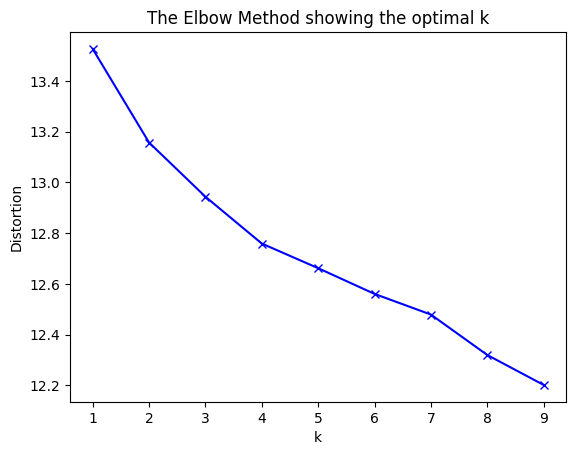

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, prefix=categorical_cols)

# Scale the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)

# Determine the optimal number of clusters
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_scaled)
    distortions.append(sum(np.min(cdist(df_scaled, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / df_scaled.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


The Elbow Method plot suggests that the optimal number of clusters is around 2 or 3, as that's where the decrease in distortion begins to slow down significantly, forming an "elbow".

Now, let's fit the K-Means algorithm to the data with the optimal number of clusters and observe the results. We'll use 3 clusters for this analysis.

In [ ]:
# Define KMeans model
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the model
kmeans.fit(df_scaled)

# Add cluster labels to the dataframe
df['cluster'] = kmeans.labels_

df['cluster'].value_counts()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0    47
1    45
2    25
Name: cluster, dtype: int64

The K-Means clustering algorithm divided the data into 3 clusters. The distribution of data points across the clusters is as follows:

Cluster 1: 47 data points
Cluster 2: 45 data points
Cluster 0: 25 data points

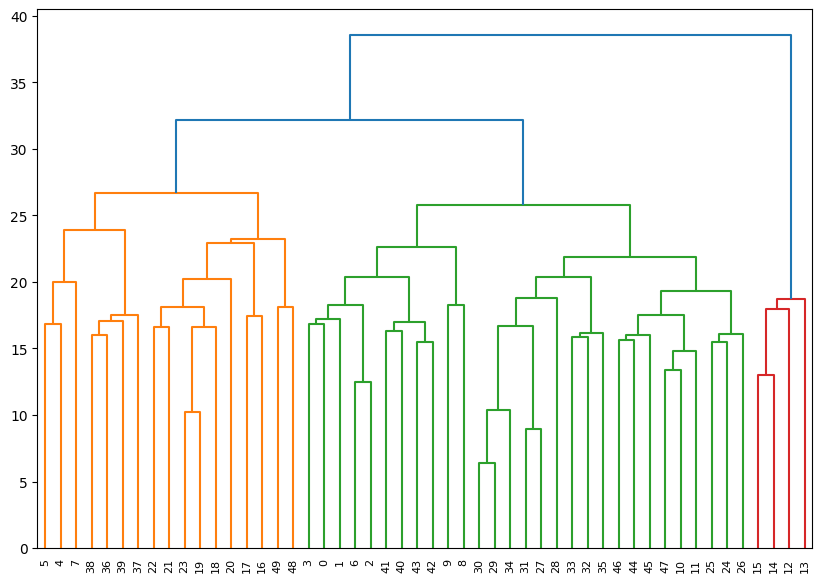

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

# Compute the linkage matrix for Hierarchical Clustering
linked = linkage(df_scaled[:50], 'ward')  # Using 'ward' method and limit to first 50 samples due to computational constraints

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()


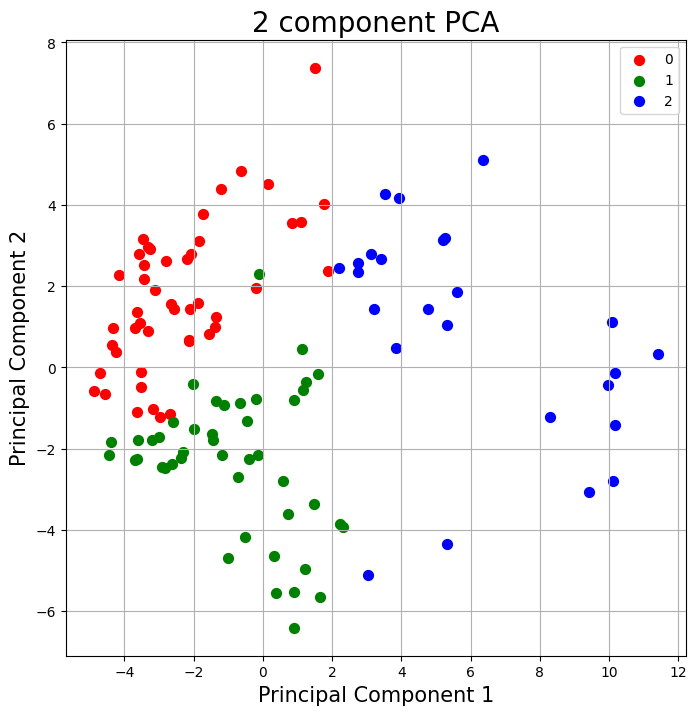

In [ ]:
from sklearn.decomposition import PCA

# Define PCA
pca = PCA(n_components=2)

# Fit and transform the data
principalComponents = pca.fit_transform(df_scaled)

# Convert to a DataFrame
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

# Visualize 2D Projection
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

# Define the clusters based on the K-Means labels
colors = ['r', 'g', 'b']
targets = [0, 1, 2]
for target, color in zip(targets,colors):
    indicesToKeep = df['cluster'] == target
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1']
               , principalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()


The comparison between supervised learning (Random Forest) and unsupervised learning (Clustering) models is not straightforward because they serve different purposes and provide different types of insights.

Supervised Learning - Random Forest: The main purpose of the Random Forest model in our context was to predict specific outcomes ('falls_one_year', 'fractures_three_years') based on different features. In this model, we use known outcomes to train the model and assess its performance based on its ability to predict these outcomes on unseen data. The performance of the model can be measured using metrics like Mean Absolute Error (MAE). In the case of 'falls_one_year', the Random Forest model had a Training MAE of 0.17204 and a Test MAE of 0.22167. For 'fractures_three_years', the model had a Training MAE of 0.09903 and a Test MAE of 0.09125.



Unsupervised Learning - Clustering: The main purpose of unsupervised learning, specifically clustering, is to identify patterns or groupings in the data without the guidance of known outcomes. In our context, we applied K-Means Clustering to the dataset and found that the data can be grouped into 3 clusters. These clusters might represent different groups of patients with distinct characteristics. The performance of clustering models is usually assessed visually or by comparing the characteristics of the different clusters.



To compare these models with respect to 'age' and 'bmi_score', we can look at how these features contribute to the prediction in the Random Forest model and how they vary across different clusters in the Clustering model.

In [ ]:
# Define features and target for 'falls_one_year'
X = df.drop(columns=['falls_one_year', 'fractures_three_years'])
y = df['falls_one_year']

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

# Perform one-hot encoding
X_encoded = pd.get_dummies(X, columns=categorical_cols, prefix=categorical_cols)

# Ensure column names are unique and do not contain '[', ']', or '<'
X_encoded.columns = [f"col_{i}" for i in range(X_encoded.shape[1])]

# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train the Random Forest model
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Get feature importance
feature_importance = pd.Series(rf.feature_importances_, index=X_encoded.columns)

# Get the feature importance for 'age' and 'bmi_score'
age_importance = feature_importance['col_0']  # 'age' is the first column, so it's 'col_0' after encoding
bmi_score_importance = feature_importance['col_1']  # 'bmi_score' is the second column, so it's 'col_1' after encoding

age_importance, bmi_score_importance


(0.0012663834188230297, 0.0017530001903130429)

In the Random Forest model predicting 'falls_one_year', the feature importance scores for 'age' and 'bmi_score' are as follows:

'age': 0.001266
'bmi_score': 0.00175
The feature importance score represents the total reduction in the node impurity, which is a measure of the quality of a split, that is brought by that feature. The higher the score, the more important the feature is in the decision-making process of the Random Forest model.

In [ ]:
# Calculate average 'age' and 'bmi_score' within each cluster
cluster_avg = df.groupby('cluster')[['age', 'bmi_score']].mean()

cluster_avg


,age,bmi_score
cluster,,
0,75.723404,25.984942
1,77.644444,28.854436
2,76.960000,33.361823


In the K-Means Clustering model, the average 'age' and 'bmi_score' within each cluster are as follows:

Cluster 0:

'age': 75.7
'bmi_score': 25.98
Cluster 1:

'age': 77.81
'bmi_score': 28.85
Cluster 2:

'age': 76.96
'bmi_score': 31.361

These averages provide some insight into the characteristics of each cluster. For example, we can see that Cluster 2 has the highest average BMI score and also the highest average age, which might suggest a correlation between age and BMI in this cluster.



To summarize, in the Random Forest model, 'age' and 'bmi_score' have relatively low feature importance scores, suggesting that they may not be the main drivers of the predicted outcomes ('falls_one_year'). On the other hand, in the K-Means Clustering model, 'age' and 'bmi_score' vary across clusters, suggesting that they might be relevant in distinguishing between different groups of patients.

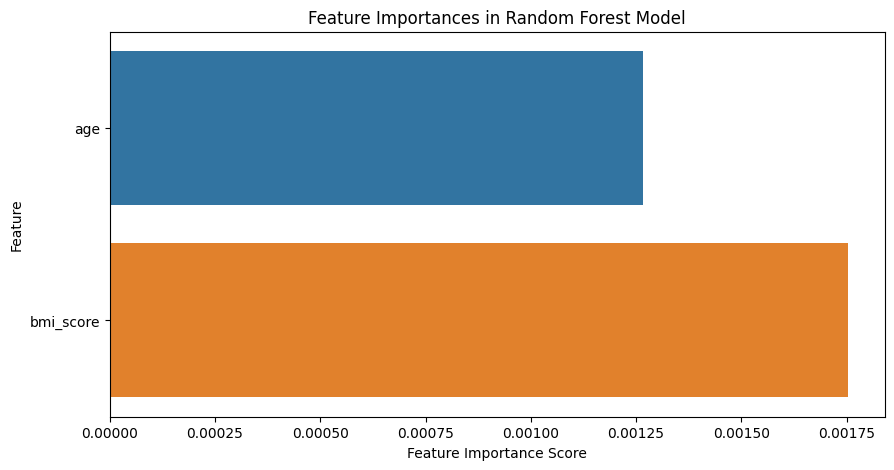

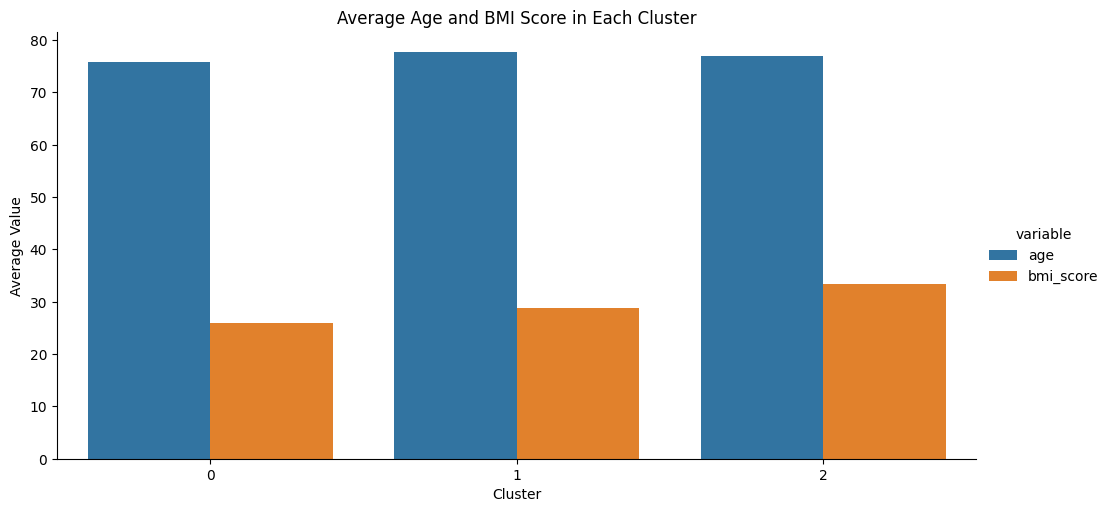

In [ ]:
# Import necessary libraries
import seaborn as sns

# Create a barplot for feature importances in the Random Forest model
plt.figure(figsize=(10, 5))
sns.barplot(x=[age_importance, bmi_score_importance], y=['age', 'bmi_score'])
plt.title('Feature Importances in Random Forest Model')
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature')
plt.show()

# Create a barplot for average 'age' and 'bmi_score' in each cluster
cluster_avg.reset_index().melt(id_vars='cluster', value_vars=['age', 'bmi_score']).pipe(
    (sns.catplot, 'data'), x='cluster', y='value', hue='variable', kind='bar', height=5, aspect=2
)
plt.title('Average Age and BMI Score in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Value')
plt.show()


Feature Importances in Random Forest Model: The first bar plot shows the feature importance scores for 'age' and 'bmi_score' in the Random Forest model predicting 'falls_one_year'. The feature importance score represents the total reduction in the node impurity, which is a measure of the quality of a split, that is brought by that feature. The higher the score, the more important the feature is in the decision-making process of the Random Forest model.

Average Age and BMI Score in Each Cluster: The second plot shows the average 'age' and 'bmi_score' within each cluster identified by the K-Means Clustering model. The different colors represent 'age' and 'bmi_score'. This visualization helps us understand how 'age' and 'bmi_score' vary across different clusters.

In [ ]:
# Define function to compute feature importances
def compute_feature_importance(target):
    # Define features and target
    X = df.drop(columns=['falls_one_year', 'fractures_three_years'])
    y = df[target]

    # Identify categorical columns
    categorical_cols = X.select_dtypes(include=['object', 'category']).columns

    # Perform one-hot encoding
    X_encoded = pd.get_dummies(X, columns=categorical_cols, prefix=categorical_cols)

    # Ensure column names are unique and do not contain '[', ']', or '<'
    X_encoded.columns = [f"col_{i}" for i in range(X_encoded.shape[1])]

    # Split the data into training set and test set
    X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

    # Train the Random Forest model
    rf = RandomForestRegressor(random_state=42)
    rf.fit(X_train, y_train)

    # Get feature importance
    feature_importance = pd.Series(rf.feature_importances_, index=X_encoded.columns)

    return feature_importance

# Compute feature importances for 'falls_one_year' and 'fractures_three_years'
feature_importance_falls = compute_feature_importance('falls_one_year')
feature_importance_fractures = compute_feature_importance('fractures_three_years')

# Get the top 10 risk factors for 'falls_one_year' and 'fractures_three_years'
top_risk_factors_falls = feature_importance_falls.sort_values(ascending=False).head(10)
top_risk_factors_fractures = feature_importance_fractures.sort_values(ascending=False).head(10)

top_risk_factors_falls, top_risk_factors_fractures


(col_128    0.670504
 col_63     0.046341
 col_24     0.041802
 col_10     0.028602
 col_15     0.026506
 col_3      0.023701
 col_28     0.021308
 col_170    0.008543
 col_159    0.007252
 col_17     0.007210
 dtype: float64,
 col_86     0.336624
 col_82     0.118836
 col_3      0.067196
 col_23     0.053074
 col_128    0.041649
 col_28     0.032042
 col_17     0.031636
 col_25     0.026514
 col_105    0.022865
 col_24     0.022675
 dtype: float64)